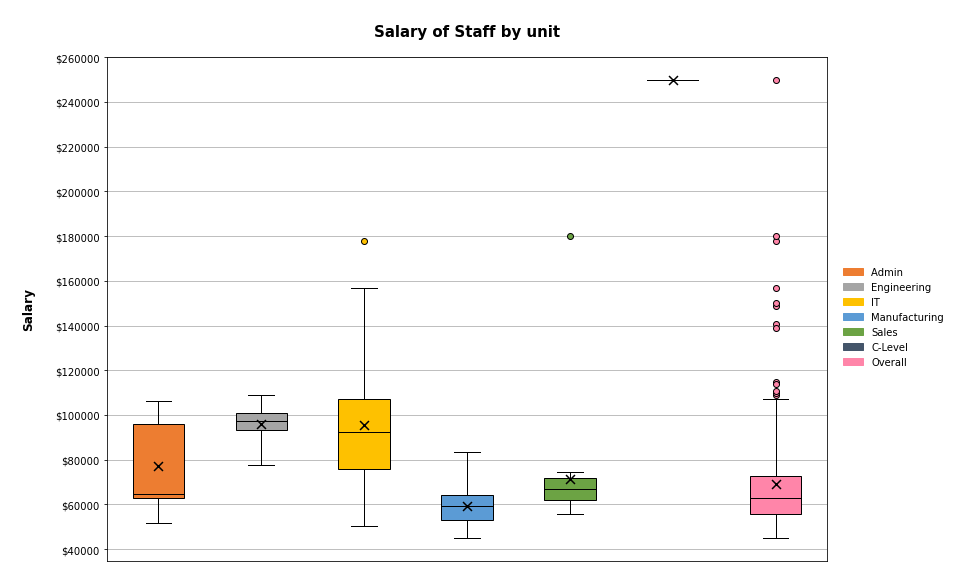

,Unit,Average Salary,3rd Quartile,Median,1st Quartile,Upper Whisker,Lower Whisker
0,Admin,$77315,$96198,$64520,$63002,$106367,$51920
1,C-Level,$250000,-,-,-,-,-
2,Engineering,$95867,$101003,$97470,$93091,$108987,$83363
3,IT,$95551,$107226,$92328,$76029,$150290,$50178
4,Manufacturing,$59413,$64246,$59472,$53018,$80512,$45046
5,Sales,$71427,$71615,$67030,$61818,$74326,$55875
6,Overall,$69118,$72904,$63002,$55742,$97999,$45046


In [1]:
#Question1(B)

#Python Chart 1 : Box and Whisker chart 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy import percentile
from matplotlib.lines import Line2D
from matplotlib import ticker

# Read File
DF = pd.read_csv(r"TMA_Data.csv")

# initialise Variables
data = []
legen_p = []
legen = ["Admin ","Engineering","IT","Manufacturing","Sales","C-Level"]
colour_p = []

# color dictionary for reference
color_dict = {
    "Admin "       :"#ED7D31",
    "Engineering"  :"#A5A5A5",
    "IT"           :"#FEC100",
    "Manufacturing":"#5B9BD5",
    "Sales"        :"#6CA344",
    "C-Level"      :"#44556A",
    "Overall"      :"#FF85A9",
}

for i,unit in enumerate(legen):
    colour_p.append(color_dict[str(unit)])
    data.append(list(DF[DF["Unit"]==unit]["Salary"]))
    legen_p.append( mpatches.Patch(color=color_dict[str(unit)], label=str(unit)) )

#  Overall data
data.append(list(DF["Salary"]))
legen_p.append( mpatches.Patch(color=color_dict["Overall"], label="Overall") )
colour_p.append("#FF85A9")

# ====================== plotting figure ===============================
# blank canvas
fig = plt.figure(figsize = (10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data,patch_artist=True,whis=2)

# figure settings 
plt.grid(True,axis="y")
plt.ylabel("\nSalary",fontweight="bold",fontsize=12,labelpad=20)
plt.title("\nSalary of Staff by unit",fontweight='bold',fontsize=15, y=1.03,)
plt.yticks(list(np.linspace(40000,260000,12)))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("$%d"))
plt.tick_params( axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(handles=legen_p, bbox_to_anchor=(1.01, 0.6),frameon=False)

# iterate through the boxplots and set its color and outlier colors
for i,plot in enumerate(bp["boxes"]):
    bp["boxes"][i].set_facecolor( colour_p[i] )
    bp["medians"][i].set_color('black')
    bp["fliers"][i].set_markerfacecolor(colour_p[i])

# Calculate and plot mean data of Salary from each Unit
mean_dat = []
for i,unit in enumerate(legen):
    df_u = DF[DF["Unit"]==unit]
    mean_dat.append(round(df_u["Salary"].mean(),2))
    plt.scatter(
                x = i+1,
                y = round(df_u["Salary"].mean(),2),
                color = 'black',zorder=3,marker='x',s=80
                )
# Calculate and plot mean data of Overall Salary
plt.scatter(
            x = i+2,
            y = round(DF["Salary"].mean(),2),
            color = 'black',zorder=3,marker='x',s=80
            )

# show plot
plt.show()

# ============ Table Summary ============

# initialise variables
units = ["Admin ","C-Level","Engineering","IT","Manufacturing","Sales"]

# Data dictionary that will be used for Dataframe making
df_dict = {
    "Unit": units,
    "Average Salary": [],
    "3rd Quartile": [],
    "Median": [],
    "1st Quartile": [],
    "Upper Whisker": [],
    "Lower Whisker": [],
          }

# iterate through the units available and calculate the quartiles
for unit in units:
    df_u = DF[DF["Unit"]==unit]["Salary"]
    quartiles = percentile(df_u, [25, 50, 75])
    
    iqr = quartiles[2] - quartiles[0]
    upper_whisker = df_u[df_u<=quartiles[2]+1.5*iqr].max()
    lower_whisker = df_u[df_u>=quartiles[0]-1.5*iqr].min()
    
    df_dict["Average Salary"] = df_dict["Average Salary"] + ["$"+str(int(round(df_u.mean(),0)))]
    
    # Store the values into dictionary
    if str(unit) != "C-Level":
        df_dict["3rd Quartile"]  = df_dict["3rd Quartile"] + ["$"+str(int(round(quartiles[2],0)))]
        df_dict["Median"]        = df_dict["Median"] + ["$"+str(int(round(quartiles[1],0)))]
        df_dict["1st Quartile"]  = df_dict["1st Quartile"] + ["$"+str(int(round(quartiles[0],0)))]
        df_dict["Upper Whisker"] = df_dict["Upper Whisker"] + ["$"+str(int(round(upper_whisker,0)))]
        df_dict["Lower Whisker"] = df_dict["Lower Whisker"] + ["$"+str(int(round(lower_whisker,0)))]
    else:
        # if "C-Level" Unit will fill in all fields as blanks
        df_dict["3rd Quartile"]  = df_dict["3rd Quartile"] + ["-"]
        df_dict["Median"]        = df_dict["Median"] + ["-"]
        df_dict["1st Quartile"]  = df_dict["1st Quartile"] + ["-"]
        df_dict["Upper Whisker"] = df_dict["Upper Whisker"] + ["-"]
        df_dict["Lower Whisker"] = df_dict["Lower Whisker"] + ["-"]


# calculate Quartile values for overall Salary
quartiles = percentile(DF["Salary"], [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
upper_whisker = DF["Salary"][DF["Salary"]<=quartiles[2]+1.5*iqr].max()
lower_whisker = DF["Salary"][DF["Salary"]>=quartiles[0]-1.5*iqr].min()

# Store value in dictionary
df_dict["Unit"]          = df_dict["Unit"] + ["Overall"]
df_dict["Average Salary"] = df_dict["Average Salary"] + ["$"+str(int(round(DF["Salary"].mean(),0)))]
df_dict["3rd Quartile"]  = df_dict["3rd Quartile"] + ["$"+str(int(round(quartiles[2],0)))]
df_dict["Median"]        = df_dict["Median"] + ["$"+str(int(round(quartiles[1],0)))]
df_dict["1st Quartile"]  = df_dict["1st Quartile"] + ["$"+str(int(round(quartiles[0],0)))]
df_dict["Upper Whisker"] = df_dict["Upper Whisker"] + ["$"+str(int(round(upper_whisker,0)))]
df_dict["Lower Whisker"] = df_dict["Lower Whisker"] + ["$"+str(int(round(lower_whisker,0)))]

# make dictionary into dataframe and display
pd.DataFrame(df_dict)

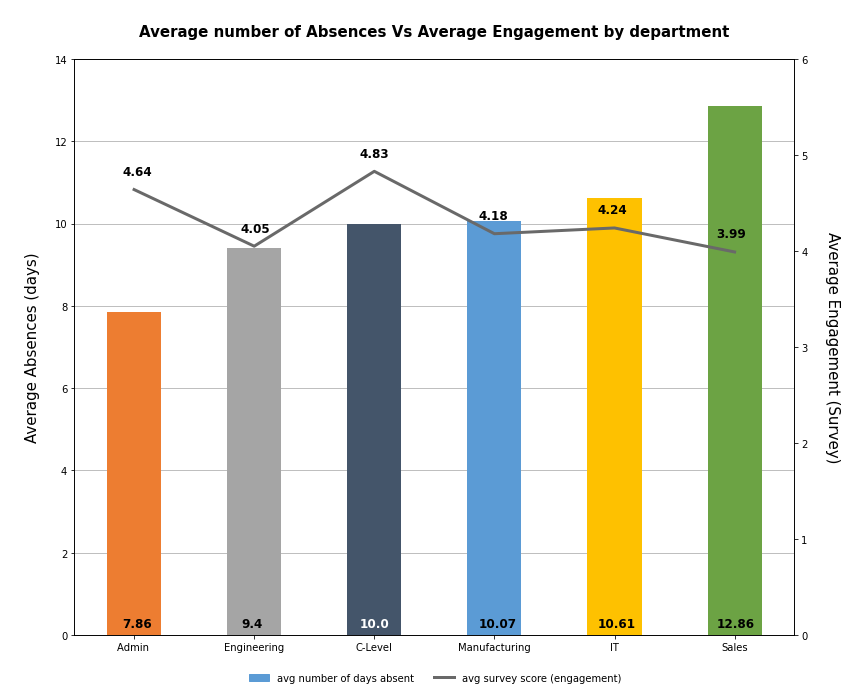

,Unit,Count,Average Engagement Survey Score,Total Number of days Absent,Average number of days Absent
0,Admin,7,4.64,55,8
1,C-Level,1,4.83,10,10
2,Engineering,10,4.05,94,9
3,IT,41,4.24,435,11
4,Manufacturing,169,4.18,1701,10
5,Sales,22,3.99,283,13
6,Overall,250,4.19,283,10


In [2]:
#Python Chart 2 : Combo chart 

import pandas     as pd
import numpy      as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy import percentile
from matplotlib.lines import Line2D

# Initialise variables
units = ["Admin ","C-Level","Engineering","IT","Manufacturing","Sales"]
colour_p = []

# Dictionary that will be made into dataframe later
df_dict_2 = {
    "Unit":units,
    "Count":[],
    "Average Engagement Survey Score":[],
    "Total Number of days Absent":[],
    "Average number of days Absent":[],
    "Average_absence_raw": [],
}

# color reference dictionary
color_dict = {
    "Admin "       :"#ED7D31",
    "Engineering"  :"#A5A5A5",
    "IT"           :"#FEC100",
    "Manufacturing":"#5B9BD5",
    "Sales"        :"#6CA344",
    "C-Level"      :"#44556A",
    "Overall"      :"#FF85A9",
    "Line"         :"#696969"
}

# summarise data first
for unit in units:
    df_u = DF[DF["Unit"]==unit]
    
    # calculate and store values into dictionary
    df_dict_2["Count"]                           = df_dict_2["Count"] + [str(len(df_u))]
    df_dict_2["Average Engagement Survey Score"] = df_dict_2["Average Engagement Survey Score"] + [round(df_u["Survey"].mean(),2)]
    df_dict_2["Total Number of days Absent"]     = df_dict_2["Total Number of days Absent"] + [df_u["Absence"].sum()]
    df_dict_2["Average number of days Absent"]   = df_dict_2["Average number of days Absent"] + [round(df_u["Absence"].mean())]
    
    #  For easier plotting later, raw 2DP values
    df_dict_2["Average_absence_raw"]             = df_dict_2["Average_absence_raw"] + [round(df_u["Absence"].mean(),2)]
    colour_p.append(color_dict[str(unit)])

# Overall value calculations (row)
df_dict_2["Unit"]                            = df_dict_2["Unit"] + ["Overall"]
df_dict_2["Count"]                           = df_dict_2["Count"] + [str(len(DF))]
df_dict_2["Average Engagement Survey Score"] = df_dict_2["Average Engagement Survey Score"] + [round(DF["Survey"].mean(),2)]
df_dict_2["Total Number of days Absent"]     = df_dict_2["Total Number of days Absent"] + [df_u["Absence"].sum()]
df_dict_2["Average number of days Absent"]   = df_dict_2["Average number of days Absent"] + [round(DF["Absence"].mean())]

# For easier plotting later, raw 2DP values
df_dict_2["Average_absence_raw"]             = df_dict_2["Average_absence_raw"] + [round(DF["Absence"].mean(),2)]
    
# Makes Dictionary into dataframe and store into variable DF_2   
DF_2 = pd.DataFrame(df_dict_2)

# Initialise variables for plots
units_2 = ["Admin ","Engineering","C-Level","Manufacturing","IT","Sales"]
bar_list = []
line_list = []

colour_p = []

# blank canvas
fig2 = plt.figure(figsize = (10, 8))

# define axes
ax2 = fig2.add_axes([0, 0, 1, 1])

# iterate through the units list and store values that will be used to plot the combo chart lines and bar graph
for unit in units_2:
    df_u = DF_2[DF_2["Unit"]==unit]
    bar_list.append( df_u["Average_absence_raw"].item() )
    line_list.append( df_u["Average Engagement Survey Score"].item() )
    colour_p.append(color_dict[str(unit)])
    
# Plot bar graph
bar = ax2.bar(units_2,bar_list,width=0.45, color=colour_p, zorder=3)

# iterate through the bar values and place it as a text on the bar chart base
for i, val in enumerate(bar_list):
    if val == 10.0: ax2.text(i-0.1-(i*0.01), 0.2, str(val), color='white',fontsize=12,fontweight='bold')
    else: ax2.text(i-0.1-(i*0.01), 0.2, str(val), color='black',fontsize=12,fontweight='bold')

# Define Y axis, title, grid settings
plt.yticks(list(np.linspace(0,14,8)))
plt.ylabel("\nAverage Absences (days)",fontsize=15,labelpad=15)
plt.title("\nAverage number of Absences Vs Average Engagement by department",fontweight='bold',fontsize=15, y=1.03)
plt.grid(True,axis='y')
ax2.grid(True,axis='y',zorder=0)

# Combo Chart part
# clone the x-axis and plot line
ax3 = ax2.twinx()
ax3.plot(units_2,line_list,color=color_dict["Line"],linewidth=3)

# define the y-axis values and y axis 
plt.yticks(list(np.linspace(0,6,7)))
plt.ylabel("\nAverage Engagement (Survey)",fontsize=15,rotation=-90,labelpad=50)

# Iterate through the line values (avg survey score (engagement)) and write the values on the chart
for i, val in enumerate(line_list):
    ax3.text(i-0.1-(i*0.01), val+0.15, str(val), color='black',fontsize=12,fontweight='bold')

# Define legend settings and place it at the base of the chart
legen = [mpatches.Patch(color=color_dict["Manufacturing"], label="avg number of days absent"),
         Line2D([0], [0], color=color_dict["Line"], lw=3, label='avg survey score (engagement)')]

plt.legend(handles=legen,ncol=2,bbox_to_anchor = (0.772, -0.05),frameon=False)

# displays the chart and table accordingly
plt.show()
DF_2.iloc[:,:-1]

In [3]:
#Question1(C)

import csv
from datetime import date

# function for getting particular row of staff details from csv file
def getRow(rowNo):
    with open('TMA_Data.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)    # to skip the header row
        
        # to skip rows and get to the particular row that is needed
        for count in range(rowNo):
            next(reader)

        row = next(reader)  # returning the particular row that is needed
        return row

# function to format the Join date and Left Date
def formatDate(dateString):
    countSlash = 0  #counter for the / in the date string, used to differentiate the day, month and year
    day = 0
    month = 0
    year = 0
    value = ""  # variable to temporarily hold the value for day, month or year
    
    y = 0
    for y in range(len(dateString)):
        if countSlash == 2: # countSlash == 2 means that the remaining of the date string forms the year value
            value = dateString[y:]
            year = int(value)
            countSlash = 0
        else:
            if dateString[y] == "/":    # used to differentiate between day, month and year values
                if countSlash == 0:
                    month = int(value)
                    value = ""
                    countSlash += 1
                elif countSlash == 1:
                    day = int(value)
                    value = ""
                    countSlash += 1
            else:
                value += dateString[y]  # concatenate the string values until it reaches the next / in the date string
    return date(year, month, day)

x = 0
listOfDurations = []    # a list to store the duration of service of all staff 
while x != 250:
    staffRow = getRow(x)
    joinDate = staffRow[7]
    if staffRow[8] == "":   # assign "1st May 2022 for rows that do not have Left date"
        leftDate = "5/1/2022"
    else:
        leftDate = staffRow[8]

    joinDate = formatDate(joinDate)
    leftDate = formatDate(leftDate)
    duration = leftDate - joinDate
    # add 1 to include the end date
    durationInDays = int(duration.days) + 1
    durationInYears = round((durationInDays / 365), 1)

    listOfDurations.append(durationInYears) #append duration to list
    x += 1  # reiterate the while loop

print("Maximum length of service is", str(max(listOfDurations)), "year(s)")
print("Minimum length of service is", str(min(listOfDurations)), "year(s)")

# calculation for average length of service
sum = 0
for duration in listOfDurations:
    sum += duration
averageLength = round(sum / len(listOfDurations), 1)
print("Average length of service is", str(averageLength), "years(s)")

Maximum length of service is 16.3 year(s)
Minimum length of service is 0.1 year(s)
Average length of service is 6.8 years(s)


In [5]:
#Question1(D)

import csv

# function to read the csv file
def loadStaffList():
    with open('TMA_Data.csv', 'r') as file:
            reader = csv.reader(file)
            next(reader)
            for row in reader:
                staffNameList.append(row[1])    # row[1] will return the staff name and append it to the list

staffNameList = []
queryName = (input("Enter staff's full name to search (Enter Q to quit): ")).title()
while queryName != "Q":
    loadStaffList()
    if queryName == "Q":    # for user to quit the program
        break
    elif queryName in staffNameList:    #check if name input by user is a staff
        print(queryName, "is a staff in the organization")
    else:
        print(queryName, "is not a staff in the organization")
    queryName = (input("Enter staff's full name to search (Enter Q to quit): ")).title()
print("Program has been stopped")


Enter staff's full name to search (Enter Q to quit): Alena Galvan
Alena Galvan is a staff in the organization
Enter staff's full name to search (Enter Q to quit): alena galvan
Alena Galvan is a staff in the organization
Enter staff's full name to search (Enter Q to quit): Alena
Alena is not a staff in the organization
Enter staff's full name to search (Enter Q to quit): q
Program has been stopped
